# Fashion MNIST Dataset Exploration

In this notebook, we explore the Fashion MNIST dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets
import os

## Dataset import

In [2]:
data_dir = '../data'

# Load the training data
train_data = datasets.FashionMNIST(data_dir, download=True, train=True)
test_data = datasets.FashionMNIST(data_dir, download=True, train=False)

## Dataset exploration

### Dataset dimensions

In [3]:
# Display the number of samples in each dataset
print('Number of samples in training data:', len(train_data))
print('Number of samples in test data:', len(test_data))

Number of samples in training data: 60000
Number of samples in test data: 10000


In [4]:
# Images dimensions
print('Image dimensions:', train_data.data[0].shape)

Image dimensions: torch.Size([28, 28])


### Class distribution

In [5]:
# Display the number of classes in the dataset
print('Number of classes:', len(train_data.classes))

# Display the classes in the dataset
print('Classes:', train_data.classes)

Number of classes: 10
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Number of samples in each class:
class
Ankle boot     7000
T-shirt/top    7000
Dress          7000
Pullover       7000
Sneaker        7000
Sandal         7000
Trouser        7000
Shirt          7000
Coat           7000
Bag            7000
Name: count, dtype: int64


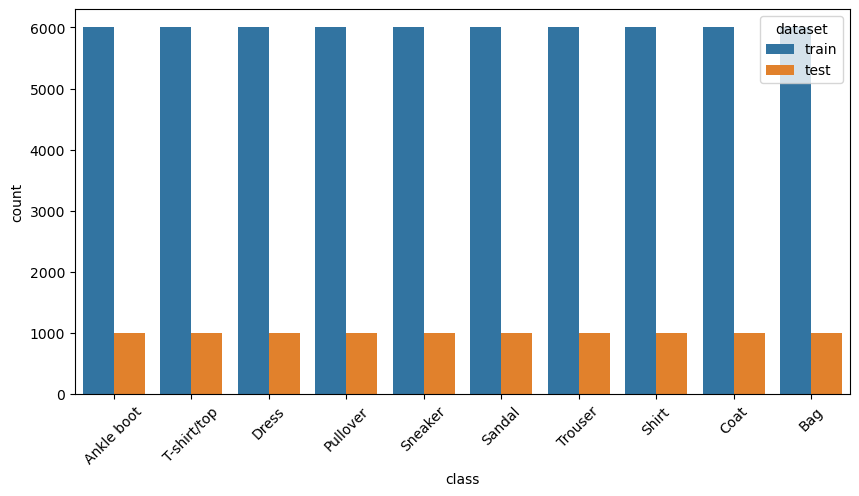

In [6]:
# Display the number of samples in each class
train_data.targets = train_data.targets.numpy()
test_data.targets = test_data.targets.numpy()
train_data_df = pd.DataFrame(train_data.targets, columns=['class'])
test_data_df = pd.DataFrame(test_data.targets, columns=['class'])
train_data_df['dataset'] = 'train'
test_data_df['dataset'] = 'test'
data_df = pd.concat([train_data_df, test_data_df])
data_df['class'] = data_df['class'].apply(lambda x: train_data.classes[x])
class_distribution = data_df['class'].value_counts()
print('Number of samples in each class:')
print(class_distribution)

# Plot the number of samples in each class
plt.figure(figsize=(10, 5))
sns.countplot(data=data_df, x='class', hue='dataset')
plt.xticks(rotation=45)
plt.show()


### Visualize sample images

In [7]:
def show_images_with_labels(images, labels, class_names, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
        ax.set_title(class_names[labels[i]]) 
    plt.show()

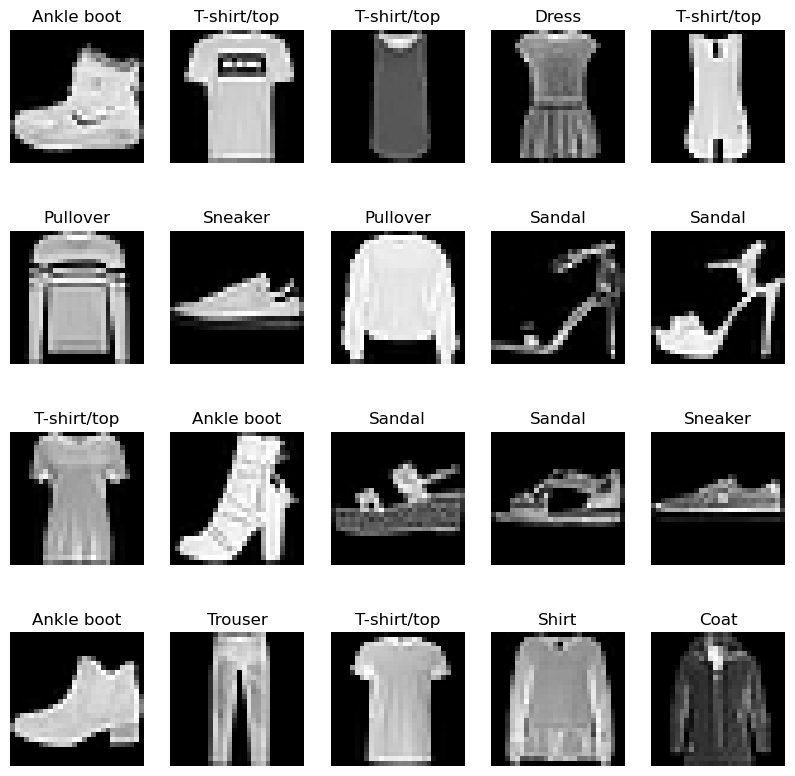

In [8]:
# Display some images
class_names = train_data.classes
show_images_with_labels(train_data.data, train_data.targets, class_names, 4, 5)

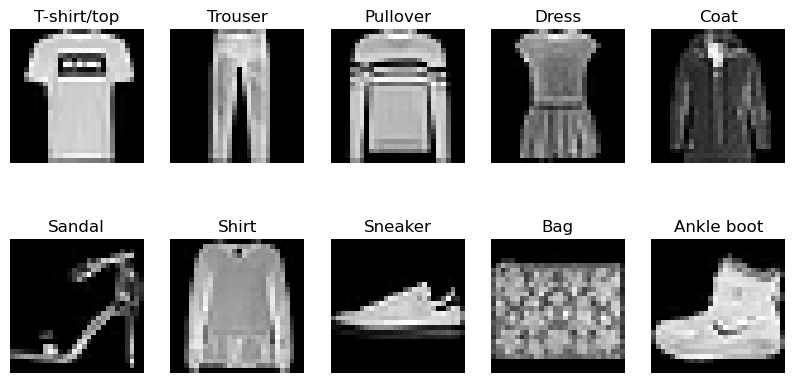

In [9]:
# Display images from each class
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    images = train_data.data[train_data.targets == i]
    ax.imshow(images[0], cmap='gray')
    ax.axis('off')
    ax.set_title(train_data.classes[i])
plt.show()
